In [13]:
import pandas as pd

df = pd.read_csv("dataset.csv", index_col=False)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["id", "is_malicious", "Unnamed: 0"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1068
           1       0.87      0.87      0.87      1089

    accuracy                           0.87      2157
   macro avg       0.87      0.87      0.87      2157
weighted avg       0.87      0.87      0.87      2157



In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [38]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       992
           1       0.85      0.79      0.82      1165

    accuracy                           0.81      2157
   macro avg       0.81      0.81      0.81      2157
weighted avg       0.81      0.81      0.81      2157



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [37]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1003
           1       0.87      0.82      0.85      1154

    accuracy                           0.84      2157
   macro avg       0.84      0.84      0.84      2157
weighted avg       0.84      0.84      0.84      2157



In [41]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

/Users/kamil/miniconda3/envs/bigdata-project/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1025
           1       0.87      0.84      0.85      1132

    accuracy                           0.85      2157
   macro avg       0.85      0.85      0.85      2157
weighted avg       0.85      0.85      0.85      2157



In [43]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linear_svc_pred = linear_svc.predict(X_test)

/Users/kamil/miniconda3/envs/bigdata-project/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
print(classification_report(linear_svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       983
           1       0.83      0.77      0.80      1174

    accuracy                           0.79      2157
   macro avg       0.79      0.79      0.79      2157
weighted avg       0.80      0.79      0.79      2157



In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [46]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       972
           1       0.88      0.81      0.84      1185

    accuracy                           0.84      2157
   macro avg       0.84      0.84      0.84      2157
weighted avg       0.84      0.84      0.84      2157



In [47]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

gauss_nb_pred = gauss_nb.predict(X_test)

In [48]:
print(classification_report(gauss_nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1384
           1       0.51      0.71      0.59       773

    accuracy                           0.65      2157
   macro avg       0.65      0.66      0.64      2157
weighted avg       0.69      0.65      0.65      2157



In [51]:
# Calculate f1 score for all models

from sklearn.metrics import f1_score

rf_score = f1_score(rf_pred, y_test)
dt_score = f1_score(dt_pred, y_test)
knn_score = f1_score(knn_pred, y_test)
mlp_score = f1_score(mlp_pred, y_test)
linear_svc_score = f1_score(linear_svc_pred, y_test)
svc_score = f1_score(svc_pred, y_test)
gauss_nb_score = f1_score(gauss_nb_pred, y_test)

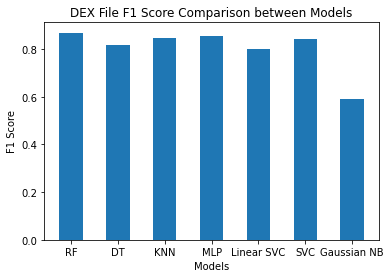

In [52]:
import matplotlib.pyplot as plt

scores = [rf_score, dt_score, knn_score, mlp_score, linear_svc_score, svc_score, gauss_nb_score]
labels = ["RF", "DT", "KNN", "MLP", "Linear SVC", "SVC", "Gaussian NB"]

plt.bar(labels, scores, width=0.5)
plt.title("DEX File F1 Score Comparison between Models")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.show()